Implement Word2Vec on a text dataset and report the embeddings visualization.

In [ ]:
# merge multiple files into 1 file using cmd: copy viwik18_* viwik18.txt

In [ ]:
# Gensim document: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
# install package

! pip install gensim


In [ ]:
# import libraries
import gensim
import gensim.downloader as api
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA
import re
import nltk
from nltk.tokenize import word_tokenize

In [47]:
# read data
with open('viwik18_aa', 'r', encoding='utf-8', errors='ignore') as f:
    text = f.read()

In [48]:
print(text[:100])

trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nh


In [ ]:
# # https://github.com/stopwords/vietnamese-stopwords/blob/master/vietnamese-stopwords.txt
# def load_stopwords(filepath):
#     with open(filepath, 'r', encoding='utf-8') as f:
#         stop_words = set(f.read().splitlines())
#     return stop_words

# stop_words = load_stopwords('/content/vietnamese-stopwords.txt')

In [49]:
def normalize_text(text):
  text = text.lower()
  text = re.sub(r'\s', ' ', text)
  text = re.sub(r'[^\w\s]', '', text)
  return text

In [50]:
def preprocess_text(text):
    content = normalize_text(text)     # Normalization

    tokens = word_tokenize(content)    # Tokenization

    # tokens = [word for word in tokens if word not in stop_words]     # Remove stopwords

    return tokens

In [51]:
words = preprocess_text(text)

In [52]:
print(words[:10])

['trang', 'chính', 'internet', 'society', 'internet', 'society', 'hay', 'isoc', 'là', 'một']


In [53]:
model = gensim.models.Word2Vec(sentences=[words], vector_size=100, window=2, min_count=1, sg=1)

In [54]:
model.save("word2vec.model")

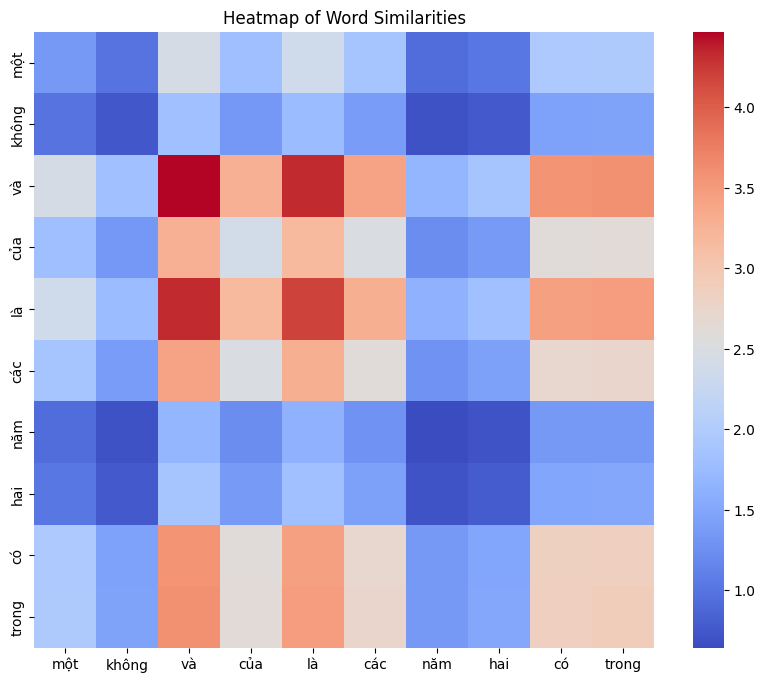

In [55]:
# Heatmap

import seaborn as sns

def visualize_embeddings_heatmap(model, num_words=10):
    embeddings = model.wv.vectors
    labels = list(model.wv.index_to_key)[:num_words]

    selected_embeddings = embeddings[:num_words]

    similarity_matrix = np.dot(selected_embeddings, selected_embeddings.T)

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=labels, yticklabels=labels, cmap='coolwarm')
    plt.title("Heatmap of Word Similarities")
    plt.show()

# top 10 words
visualize_embeddings_heatmap(model, num_words=10)

# note:

- Nhóm từ chức năng:  "là", "của", "và", "trong" => có mối tương quan thấp với các từ khác => đóng vai trò kết nối các từ mang ý nghĩa hơn chứ không mang nhiều thông tin ngữ nghĩa riêng biệt.

- Nhóm từ đồng nghĩa: vd "một", "hai", "năm": mô hình đã nắm bắt được mối quan hệ tương đồng giữa chúng.


In [56]:
# T-SNE

from sklearn.manifold import TSNE

def visualize_embeddings_tsne(model, num_points=100):
    embeddings = model.wv.vectors
    labels = list(model.wv.index_to_key)[:num_points]
    selected_embeddings = embeddings[:num_points]

    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    reduced_embeddings = tsne.fit_transform(selected_embeddings)

    plt.figure(figsize=(10, 10))
    for i, label in enumerate(labels):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, label, fontsize=9)
    plt.show()

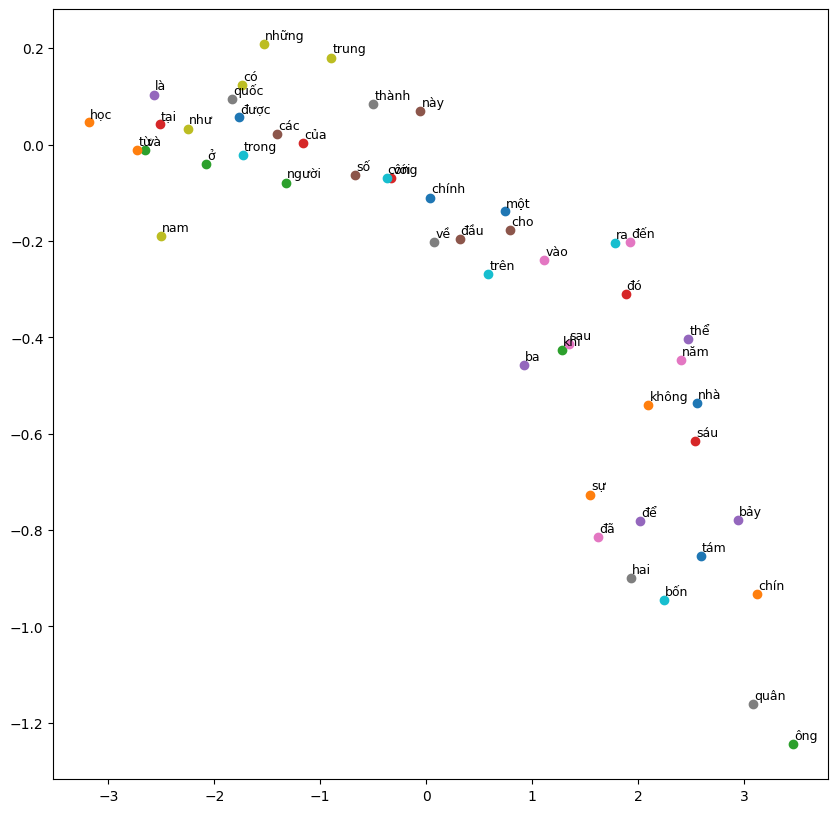

In [63]:
visualize_embeddings_tsne(model, num_points=50)

In [67]:
# visualize embeddings

def visualize_embeddings(model, num_points):
    embeddings = model.wv.vectors

    labels = list(model.wv.index_to_key)[:num_points]
    selected_embeddings = embeddings[:num_points]

    # PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(selected_embeddings)

    # matplotlib
    plt.figure(figsize=(10, 10))
    for i, label in enumerate(labels):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.text(x+0.01, y+0.01, label, fontsize=9)
    plt.show()

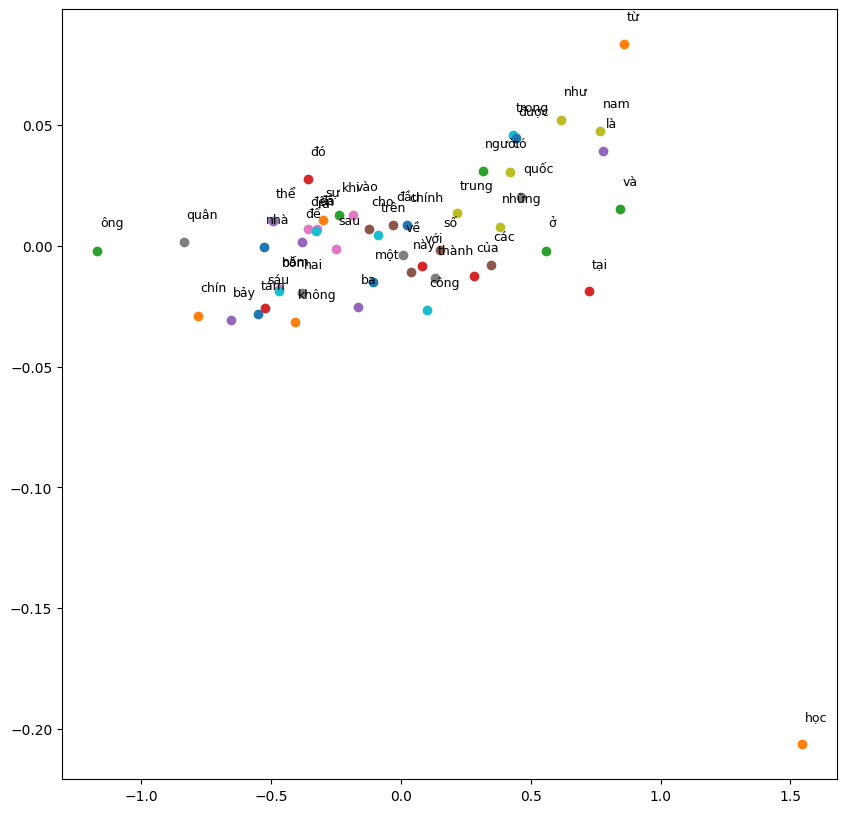

In [68]:
visualize_embeddings(model, num_points=50)

# note:
- Các nhóm từ về số: vd "chín", "bảy", "sáu", "tám", "không": mô hình đã nắm bắt được mối quan hệ tương đồng giữa chúng.
- Từ "học" nằm ở 1 vùng riêng biệt so với các từ khác, có thể do ít xuất hiện cùng với các từ khác trong training set, hoặc bản thân từ mang ý nghĩa riêng biệt so với các từ còn lại (vừa là danh từ vừa là động từ)